# Police Shootings in the United States: 2015-2024

- This dataset, compiled by The Washington Post, logs every person shot and killed by an on-duty police officer in the United States from 2015 to 2024. It includes detailed information on each incident, such as the victim's name, age, gender, race, whether they were armed, the circumstances of the encounter, and the police departments involved. The dataset aims to provide a comprehensive view of fatal police shootings in the U.S. and to improve accountability and transparency in law enforcement.

## Columns Explanation

- **date**: The exact date when the police shooting incident occurred, formatted as YYYY-MM-DD.
- **name**: The full name of the individual who was shot and killed by police.
- **age**: The age of the victim at the time of the shooting.
- **gender**: The gender of the victim - "male", "female", "non-binary".
- **armed**: Specifies whether the victim was armed at the time of the incident.
- **race**: The racial or ethnic background of the victim - "White", "Black", "Hispanic", "Unknown", "Asian", "Native American", "Other".
- **city**: The city where the police shooting took place.
- **state**: The state where the police shooting occurred, abbreviated as a two-letter code (e.g., CA for California).
- **flee**: Indicates whether the victim was attempting to flee or evade police at the time of the incident - "not", "car", "foot" or "other".
- **body_camera**: Indicates whether body camera footage was available for the incident - "True" or "False".
- **signs_of_mantal_illness**: Specifies whether the victim exhibited signs of mental illness during the incident - "True" or "False".*italicized text*
- **police_departments_involved**: The names of police departments involved in the incident.

## Project

### Configuration

- Mounting Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

#from google.colab import files
#files.upload()

Mounted at /content/gdrive


- Imports needed

In [ ]:
import pandas as pd
import numpy as np

- File path on Google Drive

In [ ]:
# Using drive.mount()
file_path = "/content/gdrive/MyDrive/Colab Notebooks/estatistica_probabilidade/2024-07-23-washington-post-police-shootings-export.csv"

#Using files.upload()
#file_path = "/content/2024-07-23-washington-post-police-shootings-export.csv"

#/content/2024-07-23-washington-post-police-shootings-export - 2024-07-23-washington-post-police-shootings-export.csv

- Reading dataset

In [ ]:
police_shootings = pd.read_csv(file_path)

length_ds = len(police_shootings)
police_shootings.head()

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


### Simple Probabilities

In [ ]:
# genders = police_shootings["gender"].value_counts(normalize=True)
# genders = police_shootings["gender"].value_counts()
# print(genders)

- The victim was a male

In [ ]:
# Use the query method to filter rows where the gender is male
male = police_shootings.query('gender == "male" ')

# Calculate the probability
male_shot = (len(male) / length_ds) * 100

print(f"The probability that the victim was male is {round(male_shot, 2)}%")

The probability that the victim was male is 95.23%


- The victim was killed in Texas

In [ ]:
# Calculate the probability using boolean indexing and mean()
texas = (police_shootings['state'] == 'TX').mean() * 100

print(f"The probability that the shooting occured in Texas is {round(texas, 2)}%")

The probability that the shooting occured in Texas is 9.54%


- The victim was a black person

In [ ]:
black = police_shootings['race'].value_counts(normalize=True)

black_shot = black['Black']

print(f"The probability that the victim was a black person is {round(black_shot * 100, 2)}%")

The probability that the victim was a black person is 23.71%


- The victim was killed in Wichita Falls, TX

In [ ]:
wichita_falls = (police_shootings['city'] == 'Wichita Falls').mean() * 100

print(f"The probability that the victim was killed in Wichita Falls, Texas is {round(wichita_falls, 2)}%")

The probability that the victim was killed in Wichita Falls, Texas is 0.05%


- The officer had a body camera when the shooting happened

In [ ]:
#body_camera == True
body_camera = police_shootings['body_camera'].mean()

print(f"The probability that a body camera was used is {round(body_camera * 100, 2)}%")

The probability that a body camera was used is 17.04%


- Probability of the victim had a knife while when was killed

In [ ]:
knife = (police_shootings['armed'] == 'knife').mean() * 100
print(f"The probability that the victim had a knife was {round(knife, 2)}%")

The probability that the victim had a knife was 17.01%


### Probabilities with Union (OR)

- The victim was a male or white

In [ ]:
male = police_shootings['gender'] == 'male'
white = police_shootings['race'] == 'White'

# or does not work?
male_or_white = (male | white).mean() * 100

print(f"The probability that the victim was a male or white is {round(male_or_white, 2)}%")

The probability that the victim was a male or white is 97.77%


- The victim had a sign of mental ilness or was killed in 2020

In [ ]:
# Define events
mental_ilness = police_shootings['signs_of_mental_illness'] == 'True'

police_shootings['date'] = pd.to_datetime(police_shootings['date'])
died_in_2020 = police_shootings['date'].dt.year == 2020

# Calculate the union: signs of mental illness or died in 2020
mental_ilness_or_died_in_2020 = (mental_ilness | died_in_2020).mean() * 100

# Print the result
print(f"The probability that the victim was killed in 2020 or had signs of mental illness is {round(mental_ilness_or_died_in_2020, 2)}%")


The probability that the victim was killed in 2020 or had signs of mental illness is 10.31%


- The victim was killed in Los Angeles or Houston



In [ ]:
los_angeles = police_shootings['city'] == 'Los Angeles'
houston = police_shootings['city'] == 'Houston'

la_or_hou = (los_angeles | houston).mean() * 100

# Print the result
print(f"The probability that the victim was killed in Los Angeles or Houston is {round(la_or_hou, 2)}%")

The probability that the victim was killed in Los Angeles or Houston is 2.75%


- The victim was hispanic or unknown

In [ ]:
# Define events
hispanic = police_shootings['race'] == 'Hispanic'
unknown = police_shootings['race'] == 'Unknown'

# Calculate the probability of a victim being either Hispanic or Unknown
hispanic_or_unknown = (hispanic | unknown).mean() * 100

# Print the result
print(f"The probability that the victim was Hispanic OR Unknown is {round(hispanic_or_unknown, 2)}%")

The probability that the victim was Hispanic OR Unknown is 27.97%


- The victim was killed by the New York Police Department or Los Angeles Police Department

In [ ]:
# department = police_shootings['police_departments_involved'].value_counts()
# print(department)

# Define the boolean Series for NYPD involvement
nypd = police_shootings['police_departments_involved'] == 'New York Police Department, NY'

# Define the boolean Series for LAPD involvement
lapd = police_shootings['police_departments_involved'] == 'Los Angeles Police Department, CA'

# Combine the conditions: NYPD involvement or age is 17
nypd_or_lapd = (nypd | lapd).mean() * 100

print(f"The probability that he victim was killed by the New York OR Los Angeles Police Department is {round(nypd_or_lapd, 2)}%")

The probability that he victim was killed by the New York OR Los Angeles Police Department is 2.18%


### Probabilities with Intersection (AND)


- The victim was a male and had a gun when was killed

In [ ]:
# Calculate the probability of being both male and armed with a gun
male_and_gun = ((police_shootings["gender"] == "male") & (police_shootings["armed"] == "gun")).mean()

# Convert to percentage and print the result
print(f"The probability that the victim was a male and had a gun when killed is {round(male_and_gun * 100, 2)}%")

The probability that the victim was a male and had a gun when killed is 55.88%


- The victim was white and a female

In [ ]:
# Calculate the probability of being both male and armed with a gun
female_white = ((police_shootings["gender"] == "female") & (police_shootings["race"] == "White")).mean()

# Convert to percentage and print the result
print(f"The probability that the victim was a female and white is {round(female_white * 100, 2)}%")

The probability that the victim was a female and white is 2.49%


- The victim was below 20 years old and had a gun

In [ ]:
under_20_with_gun = police_shootings[(police_shootings["age"] < 20) & (police_shootings["armed"] == 'gun')]

probability_under_20_with_gun = len(under_20_with_gun) / len(police_shootings) * 100

print(f"The probability that the victim was under 20 years old and had a gun is {round(probability_under_20_with_gun, 2)}%")


The probability that the victim was under 20 years old and had a gun is 2.62%


- The victim was killed in "CA" or "TX" and was white

In [ ]:
ca_or_tx_and_white = ((police_shootings['state'] == "CA") | (police_shootings['state'] == "TX")) & (police_shootings['race'] == "White")

print(f"The probability that the victim was killed in 'CA' or 'TX' and was white is {round(ca_or_tx_and_white.mean() * 100, 2)}%")

The probability that the victim was killed in 'CA' or 'TX' and was white is 7.08%


- The victim was killed in "FL" and is not white

In [ ]:
fl_and_not_white = (police_shootings['state'] == "FL") & ~(police_shootings['race'] == "White")

print(f"The probability that The victim was killed in 'FL' and is not white is {round(fl_and_not_white.mean() * 100, 2)}%")

The probability that The victim was killed in 'FL' and is not white is 3.43%


### Probabilities with Complement


- Qual a probabilidade de ser mulher e não estar acompanhada?

- The victim was a man and was not killed in FL

In [ ]:
man = (police_shootings["gender"] == "male").mean()
florida = (police_shootings["state"] == "FL").mean()

# Calculate the probability that the victim was a man and the incident occurred in Florida
prob_man_and_florida = man * florida  # Use multiplication for joint probability

# Calculate the complement probability (being a man but not in Florida)
prob_man_not_florida = man - prob_man_and_florida

print(f"The complement probability that the victim was a man and the incident did not occur in Florida is {round(prob_man_not_florida * 100, 2)}%")

The complement probability that the victim was a man and the incident did not occur in Florida is 89.12%


- The victim died between 17 and 21 years and was not white white

In [ ]:
# Define the conditions
age_17_and_21 = (police_shootings["age"] >= 17) & (police_shootings["age"] <= 21)
white = (police_shootings["race"] == "White")

# Calculate the probability of being in that age range
prob_age_17_and_21 = age_17_and_21.mean()

# Calculate the probability of being white in that age group
prob_white_given_age = (age_17_and_21 & white).mean()

# Calculate the complement probability (not white in that age range)
prob_not_white_given_age = prob_age_17_and_21 - prob_white_given_age

# Print the complement probability
print(f"The complement probability that the victim was between 17 and 21 and not white is {round(prob_not_white_given_age * 100, 2)}%")

The complement probability that the victim was between 17 and 21 and not white is 5.47%


- The victim was not killed in California

In [ ]:

p_in_california = (police_shootings['state'] == 'CA').mean()

p_not_in_california = 1 - p_in_california

print(f"The probability that the victim was not killed in California is {round(p_not_in_california * 100, 2)}%")


The probability that the victim was not killed in California is 86.28%


- The victim did not try to flee

In [ ]:
p_flee = (police_shootings['flee'] != 'not').mean()

p_not_flee = 1 - p_flee

print(f"The probability that the victim did not try to flee is {round(p_not_flee * 100, 2)}%")


The probability that the victim did not try to flee is 53.86%


- The victim was not under 22 years old

In [ ]:
p_under_22 = (police_shootings['age'] < 22).mean()

p_not_under_22 = 1 - p_under_22

print(f"The probability that the victim was not under 22 years old is {round(p_not_under_22 * 100, 2)}%")


The probability that the victim was not under 22 years old is 91.79%


### Probabilities of Difference



- Qual a probabilidade de ser do conjunto dos homens mas não ser do conjunto que morreu no TX?
- Qual a probabilidade de ser acompanhado pelo cônjuge e não ser acompanhado pelo pai?

- The victim had a gun and was not white

In [ ]:
# Define conditions
gun = police_shootings['armed'] == 'gun'
white = police_shootings['race'] == 'White'

# Calculate the probability of being armed with a gun
prob_gun = gun.mean()

# Calculate the probability of being white
prob_white = white.mean()

# Calculate the probability of the difference (armed with a gun but not white)
prob_difference = prob_gun - (gun & white).mean()

print(f"The probability of difference that the victim was armed with a gun and not white is {round(prob_difference * 100, 2)}%")

The probability of difference that the victim was armed with a gun and not white is 31.66%


- The victim was white and was not killed in Houston

In [ ]:
# Define conditions
white = police_shootings['race'] == 'White'
houston = police_shootings['city'] == 'Houston'

# Calculate the probability of being white
prob_white = white.mean()

# Calculate the probability of being killed in Houston
prob_houston = houston.mean()

# Calculate the probability of the difference (white but not killed in Houston)
prob_difference = prob_white - (white & houston).mean()

print(f"The probability of difference that the victim was white and not killed in Houston is {round(prob_difference * 100, 2)}%")

The probability of difference that the victim was white and not killed in Houston is 44.63%


- The victim had signs of mental ilness and was not black

In [ ]:
# Define conditions
mental_illness = police_shootings['signs_of_mental_illness'] == True
black = police_shootings['race'] == 'Black'

# Calculate the probability of having mental illness
prob_mental_illness = mental_illness.mean()

# Calculate the probability of being black
prob_black = black.mean()

# Calculate the probability of the difference (having mental illness but not black)
prob_difference = prob_mental_illness - (mental_illness & black).mean()

print(f"The probability of difference that the victim had signs of mental illness and was not black is {round(prob_difference * 100, 2)}%")

The probability of difference that the victim had signs of mental illness and was not black is 16.25%


- The victim was trying to evade the police by feet and was not armed

In [ ]:
fleeing_by_foot = police_shootings['flee'] == 'foot'

not_armed = police_shootings['armed'] == 'unarmed'

fleeing_and_not_armed = (fleeing_by_foot & not_armed).mean()

print(f"The probability that the victim was trying to evade the police by foot and was not armed is {round(fleeing_and_not_armed * 100, 2)}%")


The probability that the victim was trying to evade the police by foot and was not armed is 1.17%


In [ ]:
# Contar os valores da coluna 'flee' onde o valor é 'not'
police_shootings['flee'].value_counts()


,count
flee,
not,5328
car,1557
foot,1296
other,367


- The victim was killed in Illinois and the body camera was not available

In [ ]:
# Filtrar os top 5 estados com mais ocorrências
top_5_states = police_shootings['state'].value_counts().nlargest(5).index

# Filtrar vítimas nos top 5 estados
in_top_5_states = police_shootings['state'].isin(top_5_states)

# Filtrar vítimas onde não havia câmera corporal disponível
no_body_camera = police_shootings['body_camera'] == False

# Calcular a probabilidade de estar em um dos top 5 estados
prob_in_top_5_states = in_top_5_states.mean()

# Calcular a probabilidade da diferença (top 5 estados e não havia câmera corporal)
prob_difference = prob_in_top_5_states - (in_top_5_states & no_body_camera).mean()

# Exibir o resultado
print(f"The probability that the victim was killed in the top 5 states and the body camera was not available is {round(prob_difference * 100, 2)}%")


The probability that the victim was killed in the top 5 states and the body camera was not available is 6.48%


### Conditional Probabilities

- Qual a probabilidade de estar acompanhada sabendo que é uma mulher?
- Segunda pergunta para deixar mais claro: qual a probabilidade de estar acompanhado sabendo que foi retirado uma pessoa do grupo de mulheres?

- The  victim had a gun while was white

In [ ]:
gun = police_shootings['armed'] == 'gun'
white = police_shootings['race'] == 'White'

# Number of white victims who were armed with a gun
gun_and_white = (gun & white).sum()

# Total number of white victims
white_total = white.sum()

gun_while_white = (gun_and_white / white_total) * 100

print(f"The probability that the victim died with a gun while being white is {round(gun_while_white, 2)}%")

The probability that the victim died with a gun while being white is 59.03%


- The victim tried to escape using a car while being between younger than 16

In [ ]:
flee_car = police_shootings['flee'] == 'car'

died16 = (police_shootings["age"] <= 16)

flee_16 = (flee_car & died16).sum()

total_flee_car = flee_car.sum()

probability_flee_16 = (flee_16 / total_flee_car) * 100

print(f"The probability that the victim tried to escape using a car while being younger than 16 years is {round(probability_flee_16, 2)}%")


The probability that the victim tried to escape using a car while being younger than 16 years is 1.16%



Probability of signs of mental illness given that the person was unarmed

In [ ]:
# Condition for being unarmed
unarmed_condition = police_shootings['armed'] == 'unarmed'

# Condition for signs of mental illness
mental_illness_condition = police_shootings['signs_of_mental_illness'] == True

# Count where both conditions are true
unarmed_and_mental_illness = (unarmed_condition & mental_illness_condition).sum()

# Total count of unarmed individuals
total_unarmed = unarmed_condition.sum()

# Calculate conditional probability
prob_mental_illness_given_unarmed = (unarmed_and_mental_illness / total_unarmed) * 100

print(f"The probability of signs of mental illness given that the victim was unarmed is {round(prob_mental_illness_given_unarmed, 2)}%")

The probability of signs of mental illness given that the victim was unarmed is 18.69%


Probability of being black given that the body camera was not used

In [ ]:
# Condition for body camera not being used
body_camera_not_used_condition = police_shootings['body_camera'] == False

# Condition for being Black
black_condition = police_shootings['race'] == 'Black'

# Count where both conditions are true
black_and_no_camera = (body_camera_not_used_condition & black_condition).sum()

# Total count of incidents where the body camera was not used
total_no_camera = body_camera_not_used_condition.sum()

# Calculate conditional probability
prob_black_given_no_camera = (black_and_no_camera / total_no_camera) * 100

print(f"The probability of being Black given that the body camera was not used is {round(prob_black_given_no_camera, 2)}%")

The probability of being Black given that the body camera was not used is 22.05%


Probability of being male given that the person was armed

In [ ]:
# Condition for being armed
armed_condition = police_shootings['armed'] != 'unarmed'

# Condition for being male
male_condition = police_shootings['gender'] == 'male'

# Count where both conditions are true
armed_and_male = (armed_condition & male_condition).sum()

# Total count of armed individuals
total_armed = armed_condition.sum()

# Calculate conditional probability
prob_male_given_armed = (armed_and_male / total_armed) * 100

print(f"The probability of being male given that the person was armed is {round(prob_male_given_armed, 2)}%")

The probability of being male given that the person was armed is 95.39%


Probability of fleeing by car given that the person was armed with a gun


In [ ]:
# Condition for being armed with a gun
armed_gun_condition = police_shootings['armed'] == 'gun'

# Condition for fleeing by car
flee_car_condition = police_shootings['flee'] == 'car'

# Count where both conditions are true
flee_car_and_gun = (armed_gun_condition & flee_car_condition).sum()

# Total count of individuals armed with a gun
total_gun_armed = armed_gun_condition.sum()

# Calculate conditional probability
prob_flee_car_given_gun = (flee_car_and_gun / total_gun_armed) * 100

print(f"The probability of fleeing by car given that the person was armed with a gun is {round(prob_flee_car_given_gun, 2)}%")


The probability of fleeing by car given that the person was armed with a gun is 14.2%


### Probabilities of Bayes' Theorem



- Qual a probabilidade de ser mulher tal que esteja acompanhada?

- The victim was white given that they were armed with a gun

In [ ]:
# Conditions
gun = police_shootings['armed'] == 'gun'
white = police_shootings['race'] == 'White'

# Calculate probabilities
P_white = white.mean()
P_gun = gun.mean()
P_gun_given_white = (gun & white).mean()

# Apply Bayes' Theorem
P_white_given_gun = (P_gun_given_white * P_white) / P_gun * 100

print(f"The probability that the victim was white given they were armed with a gun is {round(P_white_given_gun, 2)}%")

The probability that the victim was white given they were armed with a gun is 20.39%


Probability that a person is armed given they are Black

In [ ]:
# Probability of a person being Black
p_black = (police_shootings['race'] == 'Black').mean()

# Probability of a person being armed
p_armed = (police_shootings['armed'] != 'unarmed').mean()

# Probability of a person being armed given they are Black
p_armed_given_black = ((police_shootings['armed'] != 'unarmed') & (police_shootings['race'] == 'Black')).sum() / (police_shootings['race'] == 'Black').sum()

# Apply Bayes' Theorem
p_black_given_armed = (p_armed_given_black * p_black) / p_armed * 100

print(f"The probability that the victim was Black given that the person is armed is: {round(p_black_given_armed, 2)}%")

The probability that the victim was Black given that the person is armed is: 23.22%


Probability that a person is Hispanic given that they were in Texas (TX)


In [ ]:
# Probability of a person being in Texas (TX)
p_texas = (police_shootings['state'] == 'TX').mean()

# Probability of a person being Hispanic
p_hispanic = (police_shootings['race'] == 'Hispanic').mean()

# Probability of a person being in Texas given they are Hispanic
p_texas_given_hispanic = ((police_shootings['state'] == 'TX') & (police_shootings['race'] == 'Hispanic')).sum() / (police_shootings['race'] == 'Hispanic').sum()

# Applying Bayes' Theorem
p_hispanic_given_texas = (p_texas_given_hispanic * p_hispanic) / p_texas * 100

print(f"The probability that the victim was Hispanic given that the person was in Texas: {round(p_hispanic_given_texas, 2)}%")

The probability that the victim was Hispanic given that the person was in Texas: 34.53%


Probability that a person is not White given that they were unarmed

In [ ]:
# Probability of being unarmed
p_unarmed = (police_shootings['armed'] == 'unarmed').mean()

# Probability of not being White
p_not_white = (police_shootings['race'] != 'White').mean()

# Probability of being unarmed given not White
p_unarmed_given_not_white = ((police_shootings['armed'] == 'unarmed') & (police_shootings['race'] != 'White')).sum() / (police_shootings['race'] != 'White').sum()

# Applying Bayes' Theorem
p_not_white_given_unarmed = (p_unarmed_given_not_white * p_not_white) / p_unarmed * 100

print(f"The probability that the victim was not White given that the person was unarmed: {round(p_not_white_given_unarmed, 2)}%")

The probability that the victim was not White given that the person was unarmed: 60.25%


Probability that a person had signs of mental illness given that they were under 21 years old

In [ ]:
# Probability of being under 21 years old
p_under_21 = (police_shootings['age'] < 21).mean()

# Probability of having signs of mental illness
p_mental_illness = (police_shootings['signs_of_mental_illness'] == True).mean()

# Probability of being under 21 given having signs of mental illness
p_under_21_given_mental = ((police_shootings['age'] < 21) & (police_shootings['signs_of_mental_illness'] == True)).sum() / (police_shootings['signs_of_mental_illness'] == True).sum()

# Applying Bayes' Theorem
p_mental_given_under_21 = (p_under_21_given_mental * p_mental_illness) / p_under_21 * 100

print(f"The probability that the victim had signs of mental illness given that the person was under 21: {round(p_mental_given_under_21, 2)}%")


The probability that the victim had signs of mental illness given that the person was under 21: 13.09%


Probability that a person was armed given that they were under 18 years old

In [ ]:
# Probability of being under 18 years old
p_under_18 = (police_shootings['age'] < 18).mean()

# Probability of being armed
p_armed = (police_shootings['armed'] != 'unarmed').mean()

# Probability of being under 18 given that the person was armed
p_under_18_given_armed = ((police_shootings['age'] < 18) & (police_shootings['armed'] != 'unarmed')).sum() / (police_shootings['armed'] != 'unarmed').sum()

# Applying Bayes' Theorem
p_armed_given_under_18 = (p_under_18_given_armed * p_armed) / p_under_18 * 100

print(f"The probability that the victim was armed given that the person was under 18: {round(p_armed_given_under_18, 2)}%")


The probability that the victim was armed given that the person was under 18: 88.76%


### Random Variables

- All the victim's races

In [ ]:
# Sorted by letter
police_shootings['race'].value_counts().sort_index()

,count
race,
Asian,175
Black,2346
"Black,Hispanic",2
Hispanic,1623
Native American,135
"Native American,Hispanic",1
Other,31
Unknown,1144
White,4432


- All the states that the victims died

> Adicionar aspas



In [ ]:
# value_counts() by default provides the ascending version
police_shootings['state'].value_counts()

,count
state,
CA,1357
TX,944
FL,635
AZ,440
GA,369
CO,355
NC,296
OH,284
TN,276


- Most common age's of the victim's

In [ ]:
# head() provides the most common ages
police_shootings['age'].value_counts().head(5)

,count
age,
33.0,332
34.0,328
31.0,321
32.0,315
30.0,313


- Least common age's of the victim's

In [ ]:
# tail() provides the least common ages
police_shootings['age'].value_counts().tail(5)

,count
age,
8.0,1
92.0,1
2.0,1
85.0,1
4.0,1


- All the police_departments by proprtions

In [ ]:
# normalize() is gets proportions instead of counts
police_shootings['police_departments_involved'].value_counts(normalize=True)

,proportion
police_departments_involved,
"Los Angeles Police Department, CA",0.014052
"Phoenix Police Department, AZ",0.012030
"Los Angeles County Sheriff's Department, CA",0.011120
"New York Police Department, NY",0.007784
"Houston Police Department, TX",0.007784
...,...
"Kansas Capitol Police, KS;Topeka Police Department, KS",0.000101
"Columbia County Sheriff's Department, AR",0.000101
"Clare County Sheriff's Department, MI",0.000101


- All victim's flee's


In [ ]:
police_shootings['flee'].value_counts(dropna=False)

,count
flee,
not,5328
car,1557
NaN,1345
foot,1296
other,367


### Probability Function

In [ ]:
# Calculate the probability distribution for the 'race' column
race_probabilities = police_shootings['race'].value_counts(sort=False).sort_index() / police_shootings['race'].count()

# Display the probabilities for each race
print("Probability distribution for 'race':\n", race_probabilities)

Probability distribution for 'race':
 race
Asian                          0.017689
Black                          0.237137
Black,Hispanic                 0.000202
Hispanic                       0.164055
Native American                0.013646
Native American,Hispanic       0.000101
Other                          0.003134
Unknown                        0.115637
White                          0.447994
White,Black                    0.000202
White,Black,Native American    0.000101
White,Hispanic                 0.000101
Name: count, dtype: float64


In [ ]:
# Calculate the probability distribution for the 'armed' column
armed_probabilities = police_shootings['armed'].value_counts(sort=False).sort_index() / police_shootings['armed'].count()

# Display the probabilities for each armed status
print("\nProbability distribution for 'armed':\n", armed_probabilities)



Probability distribution for 'armed':
 armed
blunt_object                 0.024685
blunt_object,blunt_object    0.000310
blunt_object,knife           0.000310
blunt_object,other           0.000103
gun                          0.593679
gun,knife                    0.004131
gun,other                    0.000103
gun,vehicle                  0.003925
knife                        0.173828
knife,blunt_object           0.000413
knife,knife                  0.000516
knife,vehicle                0.000310
other                        0.010122
other,blunt_object,knife     0.000103
other,gun                    0.000413
other,knife                  0.000103
replica                      0.032431
replica,knife                0.000103
replica,vehicle              0.000103
unarmed                      0.056910
undetermined                 0.043483
unknown                      0.015286
vehicle                      0.036253
vehicle,gun                  0.002066
vehicle,knife                0.000207
vehi

### Cumulative Distribution Function

Cumulative Distribution Function for races

In [ ]:
race_probabilities.cumsum()

,count
race,
Asian,0.017689
Black,0.254827
"Black,Hispanic",0.255029
Hispanic,0.419084
Native American,0.432730
"Native American,Hispanic",0.432831
Other,0.435965
Unknown,0.551602
White,0.999596


Cumulative Distribution Function for 'armed'

In [ ]:
armed_probabilities.cumsum()

,count
armed,
blunt_object,0.024685
"blunt_object,blunt_object",0.024995
"blunt_object,knife",0.025305
"blunt_object,other",0.025408
gun,0.619087
"gun,knife",0.623218
"gun,other",0.623322
"gun,vehicle",0.627246
knife,0.801074


### Simple Graphs

- Imports needed

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

- Graph displaying which gender got more killings

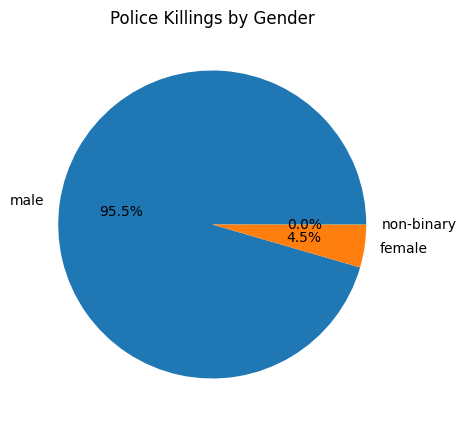

In [ ]:
gender = police_shootings['gender'].value_counts()

# Create a pie plot with improved formatting
plt.figure(figsize=(5, 5))  # Optional: adjust the figure size
plt.pie(gender.values, labels=gender.index, autopct='%1.1f%%')

# Add title
plt.title('Police Killings by Gender')

# Show the plot
plt.show()

- Graph displaying which race group had more killings

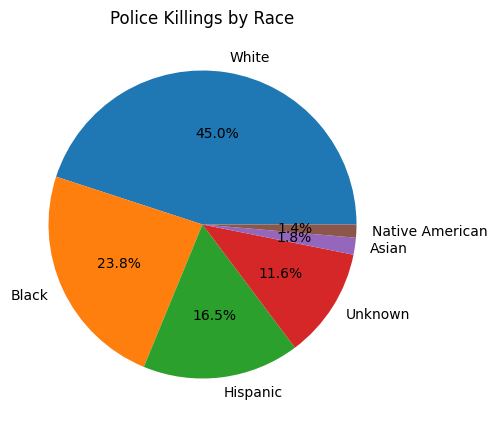

In [ ]:
# police_shootings['race'].value_counts()

# Count incidents by race
race_counts = police_shootings['race'].value_counts().head(6)

# Create a pie plot with improved formatting
plt.figure(figsize=(5, 5))  # Optional: adjust the figure size
plt.pie(race_counts.values, labels=race_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Police Killings by Race')

# Show the plot
plt.show()

- Graph displaying the age range of the victim's

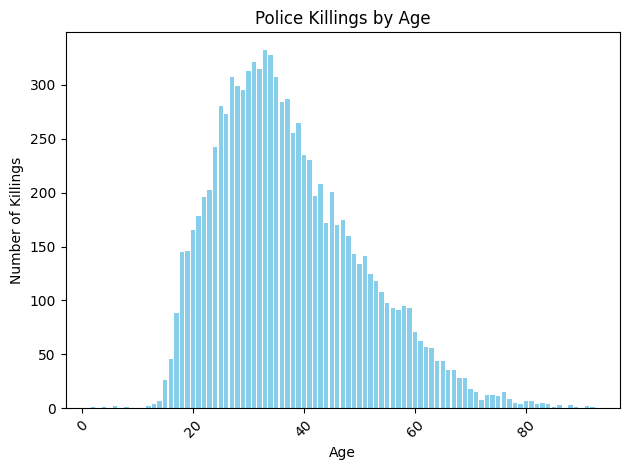

In [ ]:
# Count incidents by their age
ages = police_shootings['age'].value_counts()

# Create a bar plot with improved formatting
plt.bar(ages.index, ages.values, color='skyblue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Killings')
plt.title('Police Killings by Age')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

- Graph displaying how many killings occured on each year

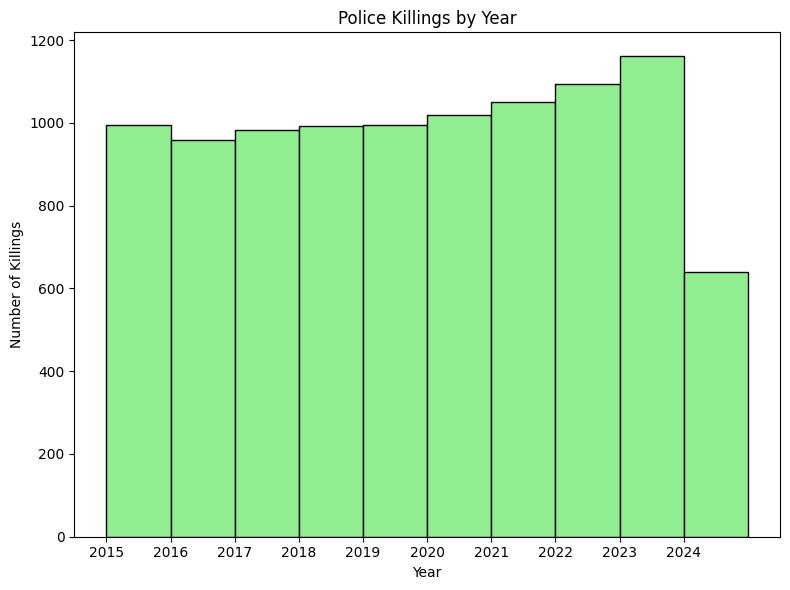

In [ ]:
# Step 1: Convert the 'date' column to datetime format
police_shootings['date'] = pd.to_datetime(police_shootings['date'])

# Step 2: Extract the year from the 'date' column
police_shootings['year'] = police_shootings['date'].dt.year

# Step 3: Plot a histogram of the number of killings by year
plt.figure(figsize=(8, 6))
plt.hist(police_shootings['year'], bins=range(police_shootings['year'].min(), police_shootings['year'].max() + 2), color='lightgreen', edgecolor='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Killings')
plt.title('Police Killings by Year')

# Step 4: Set x-ticks to display all years
plt.xticks(ticks=range(police_shootings['year'].min(), police_shootings['year'].max() + 1))

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

- Graph displaying the number of killings on each state

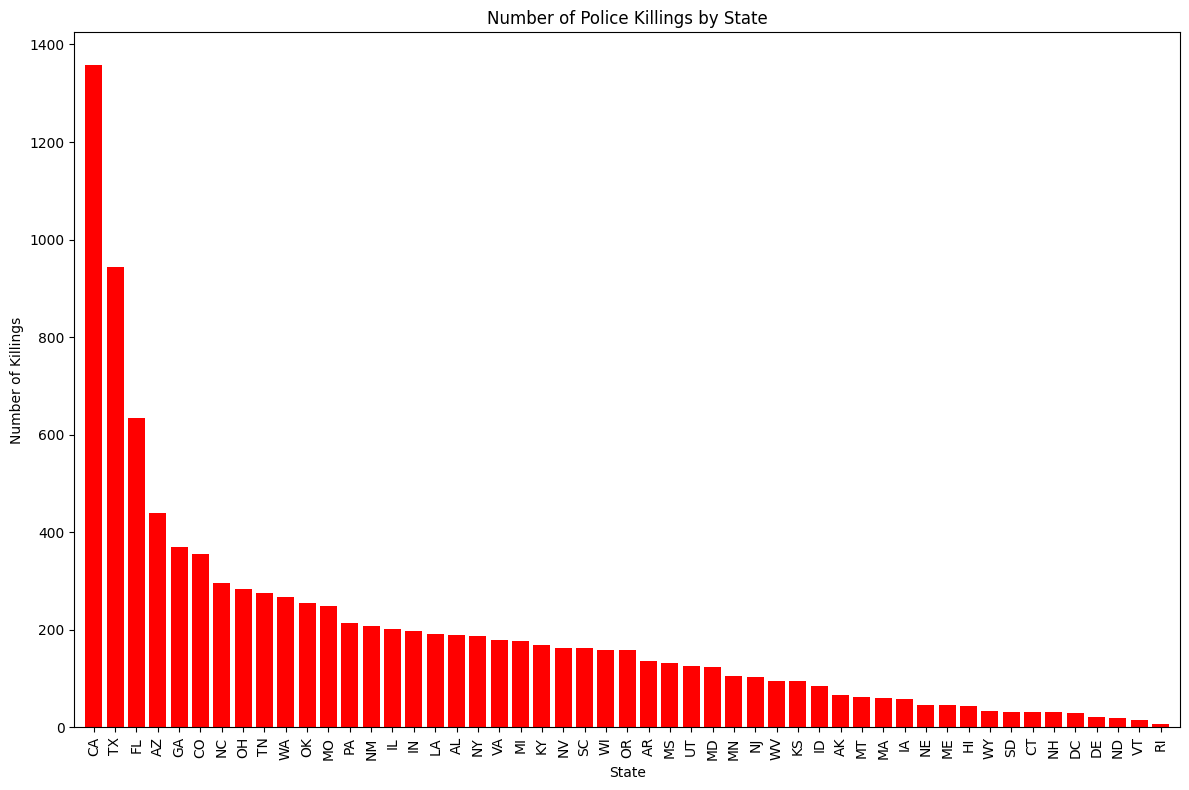

In [ ]:
# Step 1: Calculate the number of killings per state
state_counts = police_shootings['state'].value_counts()

# Step 2: Plot a bar chart
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
plt.bar(state_counts.index, state_counts.values, color='red')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Number of Killings')
plt.title('Number of Police Killings by State')

# Step 3: Rotate x-axis labels and add margin between labels
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.margins(x=0.01)  # Add space between the labels (adjust value as needed)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

### Variance and Standard Deviation

- Variance of victims' age

In [ ]:
# Calculate the variance of the age of the victims
age_variance = police_shootings['age'].var()
print(f"The variance of the victims' ages is: {age_variance:.2f}")

The variance of the victims' ages is: 167.25


- Standard deviation of victims' age

In [ ]:
# Calculate the standard deviation of the age of the victims
age_std_dev = police_shootings['age'].std()
print(f"The standard deviation of the victims' ages is: {age_std_dev:.2f}")

The standard deviation of the victims' ages is: 12.93


- Variance of victims' race

In [ ]:
# Map 'race' to numerical values using the provided mapping
race_mapping = {
    'White': 1, 'Black': 2, 'Hispanic': 3, 'Asian': 4, 'Native American': 5,
    'Other': 6, 'Unknown': 7
}
police_shootings['race_numeric'] = police_shootings['race'].map(race_mapping)

# Calculate the variance for the 'race_numeric' column
race_variance = police_shootings['race_numeric'].var()
print(f"The variance of the victims' race is: {race_variance:.2f}")

The variance of the victims' race is: 3.60


- Standard deviation of victims' race

In [ ]:
# Calculate the standard deviation for the 'race_numeric' column
race_std_dev = police_shootings['race_numeric'].std()
print(f"The standard deviation of the victims' race is: {race_std_dev:.2f}")

The standard deviation of the victims' race is: 1.90


- Variance of victims' gender

In [ ]:
# Map 'gender' to numerical values
police_shootings['gender_numeric'] = police_shootings['gender'].map({'male': 1, 'female': 0, 'non-binary': 2})

# Calculate variance for the 'gender_numeric' column
gender_variance = police_shootings['gender_numeric'].var()
print(f"The variance of the victims' gender is: {gender_variance:.2f}")

The variance of the victims' gender is: 0.04


In [ ]:
gender_variance_std_dev = police_shootings['gender_numeric'].std()
print(f"The standard deviation of the victims' gender is: {gender_variance_std_dev:.2f}")

The standard deviation of the victims' gender is: 0.21


In [ ]:
# Convert 'flee' to numeric: 0 for 'not', 1 for 'foot' and 3 for 'other
police_shootings['flee_numeric'] = police_shootings['flee'].map({'not': 0, 'car': 1, 'foot': 2, 'other': 3})

# Calculate variance for the 'flee_numeric' column
flee_variance = police_shootings['flee_numeric'].var()
print(f"The variance of the victims' flee's is: {flee_variance:.2f}")

The variance of the victims' flee's is: 0.80


In [ ]:
flee_variance_std_dev = police_shootings['flee_numeric'].std()
print(f"The standard deviation of the victims' flee's is: {flee_variance_std_dev:.2f}")

The standard deviation of the victims' flee's is: 0.89


### Covariance

- The covariance between age and gender

---



In [ ]:
# Convert 'gender' to numeric: 0 for 'male', 1 for 'female' and 2 for 'non-binary'
police_shootings['gender'] = police_shootings['gender'].replace({'male': 0, "female": 1, 'non-binary': 2})

police_shootings[['age', 'gender']].cov()

<ipython-input-69-e2d37eb0fd0a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  police_shootings['gender'] = police_shootings['gender'].replace({'male': 0, "female": 1, 'non-binary': 2})


,age,gender
age,167.252564,0.013203
gender,0.013203,0.043576


- The covariance between age and date (just used to day part)

In [ ]:
# Convert 'date' to datetime
police_shootings['date'] = pd.to_datetime(police_shootings['date'])

# Extract the day from the 'date' column and store it in a new column
police_shootings['day'] = police_shootings['date'].dt.day

# Calculate the covariance matrix between 'age' and 'day'
police_shootings[['age', 'day']].cov()

,age,day
age,167.252564,-1.736344
day,-1.736344,78.143324


- The covariance between gender and body_camera

In [ ]:
# Convert 'gender' to numeric: 0 for 'male', 1 for 'female' and 2 for 'non-binary'
police_shootings['gender'] = police_shootings['gender'].replace({'male': 0, "female": 1, 'non-binary': 2})

# Convert 'body_camera' to numeric: 0 for 'False' and 1 for 'True'
police_shootings['body_camera'] = police_shootings['body_camera'].replace({'False': 0, 'True': 1})

police_shootings[['gender', 'body_camera']].cov()

,gender,body_camera
gender,0.043576,0.000295
body_camera,0.000295,0.141394


- The covariance between body_camera and flee

In [ ]:
# Convert 'body_camera' to numeric: 0 for 'False' and 1 for 'True'
police_shootings['body_camera'] = police_shootings['body_camera'].replace({'False': 0, 'True': 1})

# Convert 'flee' to numeric: 0 for 'not', 1 for 'foot' and 3 for 'other
police_shootings['flee'] = police_shootings['flee'].replace({'not': 0, 'car': 1, 'foot': 2, 'other': 3})

police_shootings[['body_camera', 'flee']].cov()

<ipython-input-72-10ab994fc059>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  police_shootings['flee'] = police_shootings['flee'].replace({'not': 0, 'car': 1, 'foot': 2, 'other': 3})


,body_camera,flee
body_camera,0.141394,0.008605
flee,0.008605,0.797889


- The covariance between gender and signs_of_mental_ilness

In [ ]:
# Convert 'gender' to numeric: 0 for 'male', 1 for 'female' and 2 for 'non-binary'
police_shootings['gender'] = police_shootings['gender'].replace({'male': 0, "female": 1, 'non-binary': 2})

# Convert 'signs_of_mental_illness' to numeric: 0 for 'False' and 1 for 'True'
police_shootings['signs_of_mental_illness'] = police_shootings['signs_of_mental_illness'].replace({'False': 0, 'True': 1})

police_shootings[['gender', 'signs_of_mental_illness']].cov()

,gender,signs_of_mental_illness
gender,0.043576,0.005053
signs_of_mental_illness,0.005053,0.158396


### Correlation

- The correlation between age and signs_of_mental_ilness

In [ ]:
# Convert 'signs_of_mental_illness' to numeric: 0 for 'False' and 1 for 'True'
police_shootings['signs_of_mental_illness'] = police_shootings['signs_of_mental_illness'].replace({'False': 0, 'True': 1})

police_shootings[['age', 'signs_of_mental_illness']].corr()

,age,signs_of_mental_illness
age,1.000000,0.088114
signs_of_mental_illness,0.088114,1.000000


- The correlation between gender and flee

In [ ]:
# Convert 'gender' to numeric: 0 for 'male', 1 for 'female' and 2 for 'non-binary'
police_shootings['gender'] = police_shootings['gender'].replace({'male': 0, "female": 1, 'non-binary': 2})

# Convert 'flee' to numeric: 0 for 'not', 1 for 'foot' and 3 for 'other
police_shootings['flee'] = police_shootings['flee'].replace({'not': 0, 'car': 1, 'foot': 2, 'other': 3})

police_shootings[['gender', 'flee']].corr()

,gender,flee
gender,1.000000,-0.050472
flee,-0.050472,1.000000


- The correlation between age and flee

In [ ]:
# Convert 'flee' to numeric: 0 for 'not', 1 for 'foot' and 3 for 'other
police_shootings['flee'] = police_shootings['flee'].replace({'not': 0, 'car': 1, 'foot': 2, 'other': 3})

police_shootings[['age', 'flee']].corr()

,age,flee
age,1.000000,-0.206211
flee,-0.206211,1.000000


- The correlation between body_camera and signs_of_mental_ilness

In [ ]:
# Convert 'body_camera' to numeric: 0 for 'False' and 1 for 'True'
police_shootings['body_camera'] = police_shootings['body_camera'].replace({'False': 0, 'True': 1})

# Convert 'signs_of_mental_illness' to numeric: 0 for 'False' and 1 for 'True'
police_shootings['signs_of_mental_illness'] = police_shootings['signs_of_mental_illness'].replace({'False': 0, 'True': 1})

police_shootings[['body_camera', 'signs_of_mental_illness']].corr()

,body_camera,signs_of_mental_illness
body_camera,1.000000,0.039404
signs_of_mental_illness,0.039404,1.000000


- The correlation between flee and signs_of_mental_ilness

In [ ]:
# Convert 'flee' to numeric: 0 for 'not', 1 for 'foot' and 3 for 'other
police_shootings['flee'] = police_shootings['flee'].replace({'not': 0, 'car': 1, 'foot': 2, 'other': 3})

# Convert 'signs_of_mental_illness' to numeric: 0 for 'False' and 1 for 'True'
police_shootings['signs_of_mental_illness'] = police_shootings['signs_of_mental_illness'].replace({'False': 0, 'True': 1})

police_shootings[['flee', 'signs_of_mental_illness']].corr()

,flee,signs_of_mental_illness
flee,1.000000,-0.196812
signs_of_mental_illness,-0.196812,1.000000
